# Analysis of the Effects of COVID-19 on Mental Health Using a Machine Learning Approach

* Code is adapted from parent paper's code: https://github.com/MostafaRezapour/Hidden-Effects-of-COVID-19-on-Healthcare-Workers-A-Machine-Learning-Analysis/blob/main/Hidden-Effects-of-COVID-19-on-Healthcare-Workers-A-Machine-Learning-Analysis.ipynb

In [ ]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings("ignore")



In [ ]:
# Read csv file into a pandas dataframe （dataset without any missing values)
df = pd.read_csv("dataForMapping.csv")

In [ ]:
# dimensions of the dataset
df.shape

(262, 35)

In [ ]:
# first few rows
df.head(5)

,Q1,Q2,Q3,Q8,Q9,Q10,Q11,Q11a,Q11b,Q12,...,Q24,Q25,Q26,Q26a,Q27,Q27a,Q28,Q28a,Q29,Q29a
0,44,Female,Michigan,Yes,1,Yes,Not applicable,0,not applicable,8,...,0-.5 hour,Yes,Yes,I am exercising/moving less,Yes,I am eating more healthy foods,Yes,I am eating more food each day,Yes,Slightly worse
1,39,Female,Michigan,Yes,2,Yes,Yes,2,Under 12 years old,7,...,0.51 – 1 hour,No,No,I am exercising/moving less,Yes,I am eating more healthy foods,Yes,I am eating less food each day,Yes,Moderately worse
2,28,Female,Michigan,Yes,2,Yes,Yes,1,Under 12 years old,7,...,1-2 hours,Yes,Yes,I am exercising/moving more,No,I am eating less healthy foods,Yes,I am eating more food each day,Yes,Moderately worse
3,29,Female,Michigan,Yes,2,No,Not applicable,0,not applicable,7,...,1-2 hours,Yes,Yes,I am exercising/moving more,Yes,I am eating less healthy foods,Yes,I am eating more food each day,No,Slightly worse
4,32,Female,Michigan,Yes,2,No,Yes,2,Under 12 years old,7,...,1-2 hours,Yes,No,I am exercising/moving less,Yes,I am eating less healthy foods,Yes,I am eating more food each day,Yes,Moderately worse


In [ ]:
# columns in the dataset 
df.columns

Index(['Q1', 'Q2', 'Q3', 'Q8', 'Q9', 'Q10', 'Q11', 'Q11a', 'Q11b', 'Q12',
       'Q13', 'Q14', 'Q14a', 'Q15', 'Q16', 'Q16a', 'Q16b', 'Q17', 'Q18',
       'Q18a', 'Q19', 'Q20', 'Q21', 'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q26a',
       'Q27', 'Q27a', 'Q28', 'Q28a', 'Q29', 'Q29a'],
      dtype='object')

## Use mappings to convert categorical data to numeric data representation

In [ ]:
df['Q1'].unique()

array([44, 39, 28, 29, 32, 43, 59, 25, 42, 22, 41, 58, 35, 30, 38, 21, 33,
       67, 24, 45, 27, 49, 48, 57, 53, 47, 34, 36, 52, 55, 66, 68, 26, 37,
       69, 31, 40, 75, 62, 23, 20, 50, 60, 61, 46, 51, 81, 71, 63, 72, 54,
       64, 56, 65])

In [ ]:
df['Q2'].unique()

array(['Female', 'Male', 'Prefer not to say'], dtype=object)

In [ ]:
Q2_mapping = {'Female':1, 'Male':2, 'Prefer not to say': 0}
df['Q2'] = df['Q2'].map(Q2_mapping)
df['Q2']

0      1
1      1
2      1
3      1
4      1
      ..
257    1
258    2
259    1
260    1
261    1
Name: Q2, Length: 262, dtype: int64

In [ ]:
df['Q2'].unique()

array([1, 2, 0])

In [ ]:
df['Q3'].unique()

array(['Michigan', 'Georgia', 'New York', 'Illinois', 'West Virginia',
       'Utah', 'Pennsylvania', 'Maryland', 'Ohio',
       'I do not reside in the United States', 'Minnesota', 'Colorado',
       'Connecticut', 'Louisiana', 'Missouri', 'Florida', 'Puerto Rico',
       'Indiana', 'California', 'Washington', 'Kansas', 'Alabama',
       'Massachusetts', 'North Carolina', 'Texas', 'South Carolina',
       'Oregon'], dtype=object)

In [ ]:
Q3_mapping={'Michigan':1, 'Iowa':2, 'Missouri':3,
       'Ohio':4, 'Georgia':5, 'Mississippi':6, 'New York':7, 'West Virginia':8,
       'Colorado':9, 'Virginia':10, 'Illinois':11, 'Oregon':12, 'Arizona':13, 'Utah':14,
       'Pennsylvania':15, 'Florida':16, 'Kansas':17, 'Idaho':18, 'California':19,
       'I do not reside in the United States':20, 'Minnesota':21, 'Oklahoma':22,
       'Louisiana':23, 'Texas':24, 'Puerto Rico':25, 'Washington':26, 'Nebraska':27,
       'Kentucky':28, 'Massachusetts':29, 'Tennessee':30, 'Indiana':31, 'Alabama':32,
       'Maryland':33, 'Wisconsin':34, 'North Carolina':35, 'New Jersey':36,
       'New Mexico':37, 'Vermont':38, 'South Carolina':39, 'Arkansas':40,
       'Connecticut':41 }
df['Q3']= df['Q3'].map(Q3_mapping)
df['Q3']

0       1
1       1
2       1
3       1
4       1
       ..
257     5
258     1
259    19
260     1
261     1
Name: Q3, Length: 262, dtype: int64

In [ ]:
df['Q3'].unique()

array([ 1,  5,  7, 11,  8, 14, 15, 33,  4, 20, 21,  9, 41, 23,  3, 16, 25,
       31, 19, 26, 17, 32, 29, 35, 24, 39, 12])

In [ ]:
df['Q8'].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
labels = df['Q8'].astype('category').cat.categories.tolist()
Q8_mapping = {'Q8' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}
print(Q8_mapping)
df.replace(Q8_mapping, inplace=True)
df['Q8'].unique()

{'Q8': {'No': 1, 'Yes': 2}}


array([2, 1])

In [ ]:
df['Q9'].unique()

array(['1', '2', 'Yes', 'Not applicable', 'No', 'No,Not applicable'],
      dtype=object)

In [ ]:
Q9_mapping={'1':2, '2':2, 'Yes':2, 'Not applicable':1, 'No':1, 'No,Not applicable':1}
df['Q9']= df['Q9'].map(Q9_mapping)
df['Q9']

0      2
1      2
2      2
3      2
4      2
      ..
257    1
258    2
259    2
260    1
261    1
Name: Q9, Length: 262, dtype: int64

In [ ]:
df['Q9'].unique()

array([2, 1])

In [ ]:
df['Q10'].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
labels = df['Q10'].astype('category').cat.categories.tolist()
Q10_mapping = {'Q10' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}
print(Q10_mapping)
df.replace(Q10_mapping, inplace=True)
df['Q10'].unique()

{'Q10': {'No': 1, 'Yes': 2}}


array([2, 1])

In [ ]:
df['Q11'].unique()

array(['Not applicable', 'Yes', 'No'], dtype=object)

In [ ]:
Q11_mapping={'Not applicable':1, 'Yes':2, 'No':1 }
df['Q11']= df['Q11'].map(Q11_mapping)
df['Q11']

0      1
1      2
2      2
3      1
4      2
      ..
257    1
258    2
259    2
260    1
261    1
Name: Q11, Length: 262, dtype: int64

In [ ]:
df['Q14'].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
Q14_mapping={'Yes':2, 'No':1 }
df['Q14']= df['Q14'].map(Q14_mapping)
df['Q14']

0      2
1      2
2      1
3      1
4      1
      ..
257    1
258    2
259    2
260    2
261    1
Name: Q14, Length: 262, dtype: int64

In [ ]:
df['Q15'].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
Q15_mapping={'Yes':2, 'No':1 }
df['Q15']= df['Q15'].map(Q15_mapping)
df['Q15']

0      2
1      1
2      2
3      1
4      2
      ..
257    1
258    2
259    2
260    2
261    2
Name: Q15, Length: 262, dtype: int64

In [ ]:
df['Q16'].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
Q16_mapping={'Yes':2, 'No':1 }
df['Q16']= df['Q16'].map(Q16_mapping)
df['Q16']

0      2
1      2
2      1
3      2
4      1
      ..
257    2
258    1
259    2
260    2
261    1
Name: Q16, Length: 262, dtype: int64

In [ ]:
df['Q17'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
Q17_mapping={'Yes':2, 'No':1 }
df['Q17']= df['Q17'].map(Q17_mapping)
df['Q17']

0      1
1      1
2      1
3      2
4      1
      ..
257    1
258    1
259    2
260    1
261    1
Name: Q17, Length: 262, dtype: int64

In [ ]:
df['Q18'].unique()

array(['Yes'], dtype=object)

In [ ]:
Q18_mapping={'Yes':2, 'No':1 }
df['Q18']= df['Q18'].map(Q18_mapping)
df['Q18']

0      2
1      2
2      2
3      2
4      2
      ..
257    2
258    2
259    2
260    2
261    2
Name: Q18, Length: 262, dtype: int64

In [ ]:
df['Q18a'].unique()

array([1, 0])

In [ ]:
df['Q23'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
Q23_mapping={'Yes':2, 'No':1 }
df['Q23']= df['Q23'].map(Q23_mapping)
df['Q23']

0      1
1      2
2      2
3      2
4      2
      ..
257    2
258    1
259    2
260    2
261    2
Name: Q23, Length: 262, dtype: int64

In [ ]:
df['Q25'].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
Q25_mapping={'Yes':2, 'No':1 }
df['Q25']= df['Q25'].map(Q25_mapping)
df['Q25']

0      2
1      1
2      2
3      2
4      2
      ..
257    2
258    1
259    2
260    2
261    1
Name: Q25, Length: 262, dtype: int64

In [ ]:
df['Q26'].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
Q26_mapping={'Yes':2, 'No':1 }
df['Q26']= df['Q26'].map(Q26_mapping)
df['Q26']

0      2
1      1
2      2
3      2
4      1
      ..
257    2
258    2
259    2
260    2
261    2
Name: Q26, Length: 262, dtype: int64

In [ ]:
df['Q27'].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
Q27_mapping={'Yes':2, 'No':1 }
df['Q27']= df['Q27'].map(Q27_mapping)
df['Q27']

0      2
1      2
2      1
3      2
4      2
      ..
257    2
258    1
259    2
260    2
261    2
Name: Q27, Length: 262, dtype: int64

In [ ]:
df['Q28'].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
Q28_mapping={'Yes':2, 'No':1 }
df['Q28']= df['Q28'].map(Q28_mapping)
df['Q28']

0      2
1      2
2      2
3      2
4      2
      ..
257    2
258    2
259    2
260    2
261    1
Name: Q28, Length: 262, dtype: int64

In [ ]:
df['Q29'].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
Q29_mapping={'Yes':2, 'No':1 }
df['Q29']= df['Q29'].map(Q29_mapping)
df['Q29']

0      2
1      2
2      2
3      1
4      2
      ..
257    2
258    1
259    2
260    2
261    2
Name: Q29, Length: 262, dtype: int64

In [ ]:
df['Q12'].unique()

array(['8', '7', '7.75', '7:15', '5-6', '10', '1.5', '9', '6', '7-8',
       '6-7', 'seven', '7.5', '6.5', '5', '8.5', '8-10', '8-9', '5.7',
       '7-9', '4', '7 hours', '7-7.5', '7.30', '6-8'], dtype=object)

In [ ]:
Q12_mapping={'8':8, '6':6, '7':7, '7.75':8, '7:15':7, '5-6':6, '10':10, '1.5':2, '9':9, '7-8':8,
       '6-7':7, '7.5':8, 'seven':7, '6.5':7, '5':5, '8.5':9, '8-10':10, '8-9':9,
       '5.7':6, '7-9':9, '4':4, '7 hours':7, '7-7.5':7, '7.30':7, '6-8':8}
df['Q12']= df['Q12'].map(Q12_mapping)
df['Q12']

0      8
1      7
2      7
3      7
4      7
      ..
257    8
258    7
259    6
260    9
261    8
Name: Q12, Length: 262, dtype: int64

In [ ]:
df['Q12'].unique()

array([ 8,  7,  6, 10,  2,  9,  5,  4])

In [ ]:
df['Q13'].unique()

array(['9', '7', '6', '8', '7:30', '7.5', '5-6', '4-5', '4', '6.5', '5',
       '10', '4.5', 'seven', '6-7', '5-8', 'Na', '8.5', '9.5', '5-10',
       '6 (but much more variability)', '6 to 7', '7-8', '5.5', '6-8',
       '8-10', '4.3', '7.45', '3', '7-7.5', '9-10'], dtype=object)

In [ ]:
Q13_mapping={'9':9, '5.5':5, '7':7, '6':6, '8':8, '7:30':8, '7.5':8, '5-6':6, '8 ':8, '4-5':5, '4':4,
       '6.5':7, '5':5, '4.5':5, 'seven':7, '6-7':7, '5-8':8, '10':10, 'Na':6, '8.5':9,
       '9.5':9, '5-10':10, '6 (but much more variability)':6, '6 to 7':6,
       '7-8':8, '6-8':8, '8-10':10, '4.3':5, '7.45':8, '3':3, '7-7.5':7, '9-10':10 }
df['Q13']= df['Q13'].map(Q13_mapping)
df['Q13']

0       9
1       7
2       7
3       6
4       7
       ..
257     8
258     8
259     7
260    10
261     8
Name: Q13, Length: 262, dtype: int64

In [ ]:
df['Q13'].unique()

array([ 9,  7,  6,  8,  5,  4, 10,  3])

In [ ]:
df['Q19'].unique()


array(['2-3 times a week', 'Once a month or less', 'Never',
       '2-4 times a month', '4 or more times a week'], dtype=object)

In [ ]:
# Converting the Ordinal Categorical features into integers
Q19_mapping={'4 or more times a week':5, '2-4 times a month':4,  '2-3 times a week':3,  'Once a month or less':2, 'Never':1  }
df['Q19']= df['Q19'].map(Q19_mapping)
df['Q19']

0      3
1      3
2      2
3      2
4      3
      ..
257    2
258    3
259    4
260    4
261    3
Name: Q19, Length: 262, dtype: int64

In [ ]:
df['Q19'].unique()

array([3, 2, 1, 4, 5])

In [ ]:
df['Q20'].unique()

array(['4 or more times a week', '2-4 times a month', '2-3 times a week',
       'Never', 'Once a month or less'], dtype=object)

In [ ]:
# Converting the Ordinal Categorical features into integers
Q20_mapping={'4 or more times a week':5, '2-4 times a month':4,  '2-3 times a week':3,  'Once a month or less':2, 'Never':1  }
df['Q20']= df['Q20'].map(Q20_mapping)
df['Q20']

0      5
1      5
2      4
3      5
4      5
      ..
257    4
258    3
259    3
260    3
261    3
Name: Q20, Length: 262, dtype: int64

In [ ]:
df['Q20'].unique()

array([5, 4, 3, 1, 2])

In [ ]:
df['Q21'].unique()

array(['Never', '2-3 times a week', 'Once a month or less',
       '2-4 times a month', '4 or more times a week'], dtype=object)

In [ ]:
# Converting the Ordinal Categorical features into integers
Q21_mapping={'4 or more times a week':5, '2-4 times a month':4,  '2-3 times a week':3,  'Once a month or less':2, 'Never':1  }
df['Q21']= df['Q21'].map(Q21_mapping)
df['Q21']

0      1
1      1
2      1
3      1
4      1
      ..
257    1
258    1
259    1
260    1
261    1
Name: Q21, Length: 262, dtype: int64

In [ ]:
df['Q21'].unique()

array([1, 3, 2, 4, 5])

In [ ]:
df['Q22'].unique()

array(['Never', '2-3 times a week', 'Once a month or less',
       '2-4 times a month', '4 or more times a week'], dtype=object)

In [ ]:
# Converting the Ordinal Categorical features into integers
Q22_mapping={'4 or more times a week':5, '2-4 times a month':4,  '2-3 times a week':3,  'Once a month or less':2, 'Never':1  }
df['Q22']= df['Q22'].map(Q22_mapping)
df['Q22']

0      1
1      1
2      1
3      1
4      1
      ..
257    1
258    1
259    1
260    1
261    4
Name: Q22, Length: 262, dtype: int64

In [ ]:
df['Q22'].unique()

array([1, 3, 2, 4, 5])

In [ ]:
df['Q24'].unique()

array(['0-.5 hour', '0.51 – 1 hour', '1-2 hours', '2-3 hours', '3+ hours'],
      dtype=object)

In [ ]:
# Converting the Ordinal Categorical features into integers
Q24_mapping={'0-.5 hour':1, '1-2 hours':2, '0.51 – 1 hour':3, '2-3 hours':4, '3+ hours':5 }
df['Q24']= df['Q24'].map(Q24_mapping)
df['Q24']

0      1
1      3
2      2
3      2
4      2
      ..
257    4
258    1
259    5
260    4
261    2
Name: Q24, Length: 262, dtype: int64

In [ ]:
df['Q24'].unique()

array([1, 3, 2, 4, 5])

In [ ]:
df.columns

Index(['Q1', 'Q2', 'Q3', 'Q8', 'Q9', 'Q10', 'Q11', 'Q11a', 'Q11b', 'Q12',
       'Q13', 'Q14', 'Q14a', 'Q15', 'Q16', 'Q16a', 'Q16b', 'Q17', 'Q18',
       'Q18a', 'Q19', 'Q20', 'Q21', 'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q26a',
       'Q27', 'Q27a', 'Q28', 'Q28a', 'Q29', 'Q29a'],
      dtype='object')

In [ ]:
df['Q29a'].unique()

array(['Slightly worse', 'Moderately worse', 'Slightly better',
       'Much worse', 'Slightly better,About the same,Slightly worse',
       'Slightly worse,Moderately worse', 'About the same',
       'Moderately better', 'Much better',
       'About the same,Slightly worse',
       'Moderately better,Slightly better'], dtype=object)

In [ ]:
# Converting the Ordinal Categorical features into integers
Q29a_mapping={'Slightly worse':0, 
             'Moderately worse':1, 
             'Slightly better':0, 
             'Much worse':2, 
             'Slightly worse,Moderately worse':1 ,
             'About the same':0,
             'Slightly better,About the same,Slightly worse': 0, 
             'Moderately better':3,
             'Much better': 4,
             'About the same,Slightly worse': 0, 
             'Moderately better,Slightly better': 3   }
df['Q29a']= df['Q29a'].map(Q29a_mapping)
df['Q29a']

0      0
1      1
2      1
3      0
4      1
      ..
257    1
258    0
259    1
260    4
261    1
Name: Q29a, Length: 262, dtype: int64

In [ ]:
np.unique(df["Q29a"])

array([0, 1, 2, 3, 4])

In [ ]:
df["Q11b"].unique()

array(['not applicable', 'Under 12 years old', '12-17 years old',
       'Under 12 years old,12-17 years old', '18-24 years old',
       '12-17 years old,18-24 years old',
       'Under 12 years old,18-24 years old',
       'Under 12 years old,12-17 years old,18-24 years old'], dtype=object)

In [ ]:
# Converting the Ordinal Categorical features into integers
Q11b_mapping={'not applicable':0, 
             'Under 12 years old':1, 
             '12-17 years old':2, 
             'Under 12 years old,12-17 years old':3,
             '18-24 years old':4 ,
             '12-17 years old,18-24 years old':5,
             'Under 12 years old,18-24 years old': 6, 
             'Under 12 years old,12-17 years old,18-24 years old': 7 }
df['Q11b']= df['Q11b'].map(Q11b_mapping)
df['Q11b']

0      0
1      1
2      1
3      0
4      1
      ..
257    0
258    3
259    2
260    0
261    0
Name: Q11b, Length: 262, dtype: int64

In [ ]:
df["Q11b"].unique()

array([0, 1, 2, 3, 4, 5, 6, 7])

In [ ]:
df["Q14a"].unique()

array(['I am working more hours', 'I am working the same hours',
       'I am working fewer hours'], dtype=object)

In [ ]:
# Converting the Ordinal Categorical features into integers
Q14a_mapping={'I am working more hours':1, 
             'I am working the same hours':0, 
             'I am working fewer hours':2, 
              }
df['Q14a']= df['Q14a'].map(Q14a_mapping)
df['Q14a']

0      1
1      1
2      0
3      0
4      0
      ..
257    0
258    2
259    2
260    2
261    0
Name: Q14a, Length: 262, dtype: int64

In [ ]:
df["Q14a"].unique()

array([1, 0, 2])

In [ ]:
df["Q16a"].unique()

array(['I am going to bed later', 'My bedtime has not changed',
       'I am going to bed earlier'], dtype=object)

In [ ]:
# Converting the Ordinal Categorical features into integers
Q16a_mapping={'I am going to bed later':1, 
             'My bedtime has not changed':0, 
             'I am going to bed earlier':2, 
              }
df['Q16a']= df['Q16a'].map(Q16a_mapping)
df['Q16a']

0      1
1      1
2      1
3      1
4      1
      ..
257    1
258    1
259    1
260    2
261    1
Name: Q16a, Length: 262, dtype: int64

In [ ]:
df["Q16a"].unique()

array([1, 0, 2])

In [ ]:
df["Q16b"].unique()

array(['I am waking up later', 'I waking up earlier',
       'My waketime has not changed'], dtype=object)

In [ ]:
# Converting the Ordinal Categorical features into integers
Q16b_mapping={'I am waking up later':1, 
             'My waketime has not changed':0, 
             'I waking up earlier':2, 
              }
df['Q16b']= df['Q16b'].map(Q16b_mapping)
df['Q16b']

0      1
1      1
2      1
3      1
4      1
      ..
257    2
258    1
259    1
260    1
261    1
Name: Q16b, Length: 262, dtype: int64

In [ ]:
df["Q26a"].unique()

array(['I am exercising/moving less', 'I am exercising/moving more'],
      dtype=object)

In [ ]:
# Converting the Ordinal Categorical features into integers
Q26a_mapping={'I am exercising/moving less':1, 
             'I am exercising/moving more':0, 
          
              }
df['Q26a']= df['Q26a'].map(Q26a_mapping)
df['Q26a']

0      1
1      1
2      0
3      0
4      1
      ..
257    1
258    0
259    1
260    0
261    1
Name: Q26a, Length: 262, dtype: int64

In [ ]:
df["Q27a"].unique()

array(['I am eating more healthy foods', 'I am eating less healthy foods'],
      dtype=object)

In [ ]:
# Converting the Ordinal Categorical features into integers
Q27a_mapping={'I am eating more healthy foods':1, 
             'I am eating less healthy foods':0, 
          
              }
df['Q27a']= df['Q27a'].map(Q27a_mapping)
df['Q27a']

0      1
1      1
2      0
3      0
4      0
      ..
257    0
258    0
259    0
260    1
261    0
Name: Q27a, Length: 262, dtype: int64

In [ ]:
df["Q28a"].unique()

array(['I am eating more food each day', 'I am eating less food each day'],
      dtype=object)

In [ ]:
# Converting the Ordinal Categorical features into integers
Q28a_mapping={'I am eating more food each day':1, 
             'I am eating less food each day':0, 
          
              }
df['Q28a']= df['Q28a'].map(Q28a_mapping)
df['Q28a']

0      1
1      0
2      1
3      1
4      1
      ..
257    1
258    1
259    1
260    1
261    1
Name: Q28a, Length: 262, dtype: int64

In [ ]:
# write out the dataset after mapping
df.to_csv("clean_data.csv")

In [ ]:
from google.colab import files
files.download("clean_data.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
data = df

## Supervisied ML

In [ ]:
#import libraries
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import accuracy_score
from pandas import read_csv
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [ ]:
import pandas as pd
import sklearn as sk
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

from sklearn.metrics import f1_score

In [ ]:
data.columns

Index(['Q1', 'Q2', 'Q3', 'Q8', 'Q9', 'Q10', 'Q11', 'Q11a', 'Q11b', 'Q12',
       'Q13', 'Q14', 'Q14a', 'Q15', 'Q16', 'Q16a', 'Q16b', 'Q17', 'Q18',
       'Q18a', 'Q19', 'Q20', 'Q21', 'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q26a',
       'Q27', 'Q27a', 'Q28', 'Q28a', 'Q29', 'Q29a'],
      dtype='object')

In [ ]:
data.shape

(262, 35)

In [ ]:
# split into input (X) and output (y) variables
X = data.loc[:,data.columns !='Q18a'].astype(str)
y = data['Q18a'].astype(str)
# one hot encode input variables
onehot_encoder = OneHotEncoder(sparse=False)
X = onehot_encoder.fit_transform(X)
# ordinal encode target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
# summarize
print('Input', X.shape)
print('Output', y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
X_tr=X_train
y_tr=y_train

Input (262, 188)
Output (262,)


In [ ]:
# logistic regression classifier testing score
LR = LogisticRegression(random_state=0, solver='lbfgs').fit(X_tr, y_tr)
LR.predict(X_test)
round(LR.score(X_test,y_test), 4)

0.8046

In [ ]:
# logistic regression classifier training score
LR = LogisticRegression(random_state=0, solver='lbfgs').fit(X_tr, y_tr)
LR.predict(X_test)
round(LR.score(X_tr,y_tr), 4)

0.9943

In [ ]:
# use f_1 score for testing results 
pred_LR = LR.predict(X_test)
f1_score(y_test, pred_LR, pos_label='positive', average = 'micro')

0.8045977011494253

In [ ]:
# SVM testing score
SVM = svm.SVC().fit(X_tr, y_tr)
SVM.predict(X_test)
round(SVM.score(X_test, y_test), 4)

0.7931

In [ ]:
# SVM trainig score
SVM = svm.SVC().fit(X_tr, y_tr)
SVM.predict(X_test)
round(SVM.score(X_tr,y_tr), 4)

0.8914

In [ ]:
# use f_1 score for testing results 
pred_SVM = SVM.predict(X_test)
f1_score(y_test, pred_SVM, pos_label='positive', average = 'micro')

0.7931034482758621

In [ ]:
# multilayer perceptron on testing dataset
NN = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(20, 12), random_state=1).fit(X_tr, y_tr)
NN.predict(X_test)
round(NN.score(X_test, y_test), 4)

0.7816

In [ ]:
# multilayer perceptron on the training datatset
NN = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(20, 12), random_state=1).fit(X_tr, y_tr)
NN.predict(X_test)
round(NN.score(X_tr,y_tr), 4)

1.0

In [ ]:
# use f_1 score for testing results
pred_NN = NN.predict(X_test)
f1_score(y_test, pred_NN, pos_label='positive', average = 'micro')

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,


0.8045977011494253

In [ ]:
# KNN on testing dataset 
from sklearn.neighbors import KNeighborsClassifier
error = []

KNN = KNeighborsClassifier(n_neighbors=4)
KNN.fit(X_tr, y_tr)
KNN.predict(X_test)
KNN.score(X_test,y_test)

0.7816091954022989

In [ ]:
# KNN on training dataset
from sklearn.neighbors import KNeighborsClassifier
error = []

KNN = KNeighborsClassifier(n_neighbors=4)
KNN.fit(X_tr, y_tr)
KNN.predict(X_test)
round(KNN.score(X_tr,y_tr), 4)

0.9143

In [ ]:
# use f_1 score for testing results 
pred_KNN = KNN.predict(X_test)
f1_score(y_test, pred_KNN, pos_label='positive', average = 'micro')

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,


0.781609195402299

In [ ]:
# decision tree on testing data
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)
clf.fit(X_tr, y_tr)
clf.predict(X_test)
round(clf.score(X_test,y_test), 4)

0.954

In [ ]:
# decision tree on training data
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)
clf.fit(X_tr, y_tr)
clf.predict(X_test)
round(clf.score(X_tr,y_tr), 4)

0.9714

In [ ]:
# f_1 score on the testing results 
pred_DT = clf.predict(X_test)
f1_score(y_test, pred_DT, pos_label='positive', average = 'micro')

0.9540229885057472

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
# load and summarize the dataset
from pandas import read_csv
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
# xgboost for classification
from numpy import asarray
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from matplotlib import pyplot

Accuracy: 0.912 (0.033) 

Feature: 0, Score: 0.09469
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.14176
Feature: 20, Score: 0.65583
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.05102
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.05670


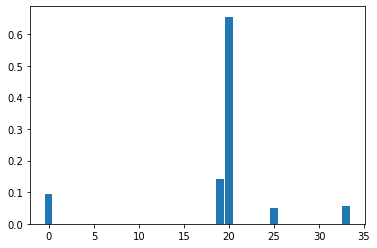

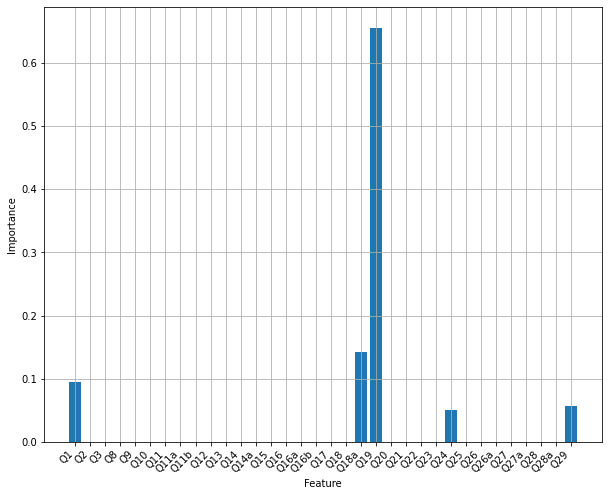

In [ ]:
# feature importance score analysis with decisiontree classifier
df4 = data

# split into input (X) and output (y) variables
X = df4.loc[:,df4.columns !='Q18a']
y = df4['Q18a']
# evaluate the model
model = DecisionTreeClassifier(criterion="entropy", max_depth=3)
empty=[]

cv = RepeatedStratifiedKFold(n_splits=9, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Accuracy: %.3f (%.3f) \n' % (mean(n_scores), std(n_scores)))
# fit the model on the whole dataset
empty.append(mean(n_scores))
model = DecisionTreeClassifier(criterion="entropy", max_depth=3)
model.fit(X, y)
names = range(2,20)
values = empty

# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

import matplotlib.pyplot as plt
   
#C = ['Q1', 'Q2', 'Q3', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15',
#       'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21', 'Q22', 'Q23', 'Q24',
#       'Q25', 'Q26', 'Q27', 'Q28', 'Q29']

C = ['Q1', 'Q2', 'Q3','Q8', 'Q9', 'Q10', 'Q11', 'Q11a', 'Q11b', 'Q12', 'Q13',
       'Q14', 'Q14a', 'Q15', 'Q16', 'Q16a', 'Q16b', 'Q17', 'Q18', 'Q18a',
       'Q19', 'Q20', 'Q21', 'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q26a', 'Q27',
       'Q27a', 'Q28', 'Q28a', 'Q29']

GC = importance
# plotting a line plot after changing it's width and height
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(8)
plt.xticks(rotation=45, ha='right')
plt.grid(True)

plt.bar(C, GC)
plt.ylabel('Importance')
plt.xlabel('Feature')
plt.show()


In [ ]:
# ensemble method with logistic regression and svm
from sklearn.ensemble import VotingClassifier
estimators = [("LogisticRegression", LR),("SVM", SVM)]
ensemble1 = VotingClassifier(estimators, voting ='hard')
ensemble1.fit(X_tr, y_tr)
round(ensemble1.score(X_tr,y_tr), 4)

0.9943

In [ ]:
pred_ensemble1 = ensemble1.predict(X_test)
f1_score(y_test, pred_ensemble1, pos_label='positive', average = 'micro')

0.8045977011494253

In [ ]:
# ensemble method with log_reg, svm, multilayer perceptron
from sklearn.ensemble import VotingClassifier
estimators = [("LogisticRegression", LR),("SVM", SVM), ("NN", NN)]
ensemble2 = VotingClassifier(estimators, voting ='hard')
ensemble2.fit(X_tr, y_tr)
round(ensemble2.score(X_tr,y_tr), 4)

0.9943

In [ ]:
pred_ensemble2 = ensemble2.predict(X_test)
f1_score(y_test, pred_ensemble2, pos_label='positive', average = 'micro')

0.8045977011494253

In [ ]:
# Ensemble using LR, SVM, NN, KNN, DT
estimators = [("LogisticRegression", LR),("SVM", SVM), ("NN", NN), ("KNN", KNN), ("DT", clf)]
ensemble_all = VotingClassifier(estimators, voting ='hard')
ensemble_all.fit(X_tr, y_tr)
round(ensemble_all.score(X_tr,y_tr), 4)

0.9886

In [ ]:
# testing accuracy score
ensemble_all.fit(X_test, y_test)
round(ensemble_all.score(X_test, y_test), 4)

0.9329

In [ ]:
# f_1 score for testing results 
pred_ensemble_all = ensemble_all.predict(X_test)
f1_score(y_test, pred_ensemble_all, pos_label='positive', average = 'micro')

0.8160919540229885

Accuracy: 0.949 (0.030) 

Feature: 0, Score: 0.02665
Feature: 1, Score: 0.05551
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.02586
Feature: 4, Score: 0.00559
Feature: 5, Score: 0.02716
Feature: 6, Score: 0.05879
Feature: 7, Score: 0.04480
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.03621
Feature: 10, Score: 0.04321
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02748
Feature: 13, Score: 0.02490
Feature: 14, Score: 0.03934
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.10650
Feature: 20, Score: 0.17230
Feature: 21, Score: 0.02117
Feature: 22, Score: 0.02582
Feature: 23, Score: 0.03591
Feature: 24, Score: 0.01200
Feature: 25, Score: 0.03457
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.01731
Feature: 29, Score: 0.04847
Feature: 30, Score: 0.02884
Feature: 31, Score: 0.03133
Feature: 32, Score: 0.01519
Feature: 33, Score: 0.03510


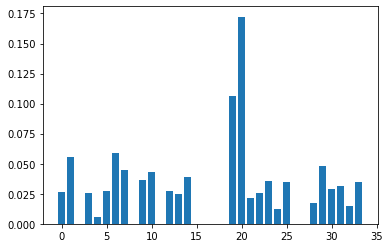

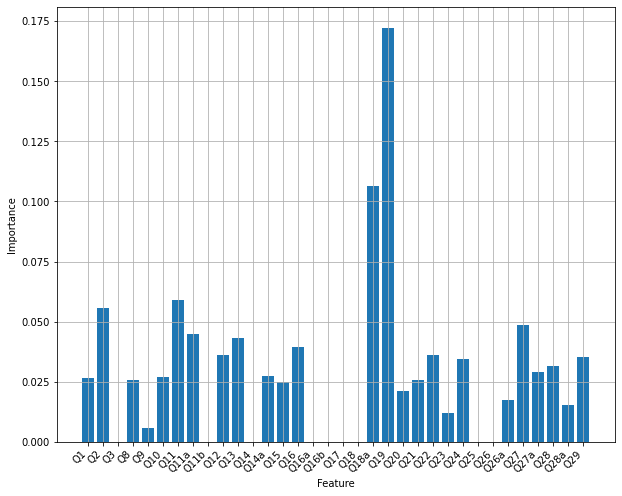

In [ ]:

# data = df4.values
data = df4.values

# split into input (X) and output (y) variables
X = df4.loc[:,df4.columns !='Q18a']
y = df4['Q18a']
# evaluate the model
model = XGBClassifier()
empty=[]

cv = RepeatedStratifiedKFold(n_splits=9, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Accuracy: %.3f (%.3f) \n' % (mean(n_scores), std(n_scores)))
# fit the model on the whole dataset
empty.append(mean(n_scores))
model = XGBClassifier()
model.fit(X, y)
names = range(2,20)
values = empty

# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

import matplotlib.pyplot as plt
   
#C = ['Q1', 'Q2', 'Q3', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15',
#       'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21', 'Q22', 'Q23', 'Q24',
#       'Q25', 'Q26', 'Q27', 'Q28', 'Q29']

C = ['Q1', 'Q2', 'Q3','Q8', 'Q9', 'Q10', 'Q11', 'Q11a', 'Q11b', 'Q12', 'Q13',
       'Q14', 'Q14a', 'Q15', 'Q16', 'Q16a', 'Q16b', 'Q17', 'Q18', 'Q18a',
       'Q19', 'Q20', 'Q21', 'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q26a', 'Q27',
       'Q27a', 'Q28', 'Q28a', 'Q29']

GC = importance
# plotting a line plot after changing it's width and height
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(8)
plt.xticks(rotation=45, ha='right')
plt.grid(True)

plt.bar(C, GC)
plt.ylabel('Importance')
plt.xlabel('Feature')
plt.show()

## Following models do not exceed the 95% accuracy,but we still conduct feature importance score anlysis to get some insights

In [ ]:
# Install catboost library 
!pip install catboost

     |████████████████████████████████| 76.6 MB 1.3 MB/s 


Accuracy: 0.908 (0.042)
Accuracy: 0.914 (0.041)
Accuracy: 0.916 (0.042)
Accuracy: 0.920 (0.043)
Accuracy: 0.922 (0.035)
Accuracy: 0.920 (0.049)
Accuracy: 0.915 (0.042)
Accuracy: 0.917 (0.042)
Accuracy: 0.910 (0.041)
Accuracy: 0.915 (0.040)
Accuracy: 0.911 (0.041)
Accuracy: 0.913 (0.038)
Accuracy: 0.908 (0.041)
Accuracy: 0.916 (0.042)
Accuracy: 0.911 (0.036)
Accuracy: 0.914 (0.042)


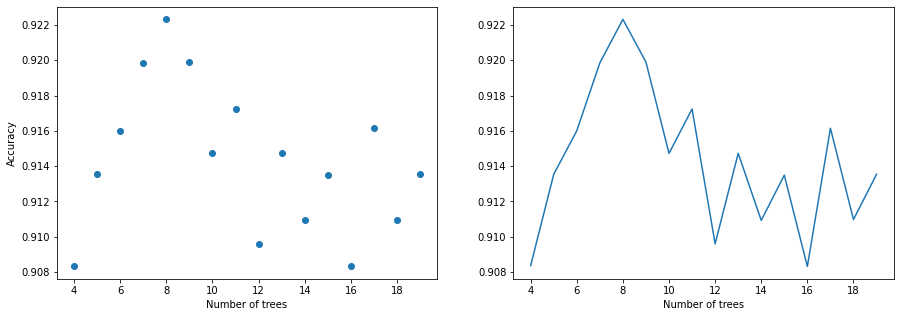

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
from pandas import read_csv
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
from numpy import asarray
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from matplotlib import pyplot
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from matplotlib import pyplot
X = df4.loc[:,df4.columns !='Q18a']
y = df4['Q18a']
# evaluate the model
empty=[]
for i in range(4,20):
    model = CatBoostClassifier(verbose=0, n_estimators=i)
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
    # fit the model on the whole dataset
    empty.append(mean(n_scores))
    model = CatBoostClassifier(verbose=0, n_estimators=i)
    model.fit(X, y)
names = range(4,20)
values = empty

plt.figure(figsize=(15, 5))

plt.subplot(121)
plt.scatter(names, values)
plt.ylabel('Accuracy')
plt.xlabel('Number of trees')
plt.subplot(122)
plt.plot(names, values)
plt.xlabel('Number of trees')
plt.show()

Feature: 0, Score: 3.68670
Feature: 1, Score: 3.16646
Feature: 2, Score: 1.20484
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.49605
Feature: 5, Score: 1.16931
Feature: 6, Score: 1.22874
Feature: 7, Score: 2.39266
Feature: 8, Score: 0.28698
Feature: 9, Score: 1.18362
Feature: 10, Score: 1.97666
Feature: 11, Score: 0.27237
Feature: 12, Score: 4.55202
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 2.46807
Feature: 16, Score: 3.20832
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 14.44898
Feature: 20, Score: 41.65029
Feature: 21, Score: 0.98900
Feature: 22, Score: 0.90398
Feature: 23, Score: 0.80584
Feature: 24, Score: 2.39394
Feature: 25, Score: 2.11757
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.54850
Feature: 29, Score: 5.22197
Feature: 30, Score: 0.58855
Feature: 31, Score: 0.63753
Feature: 32, Score: 2.40106
Feature: 33, Score: 0.00000


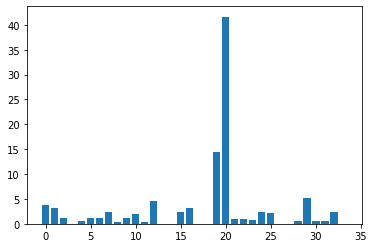

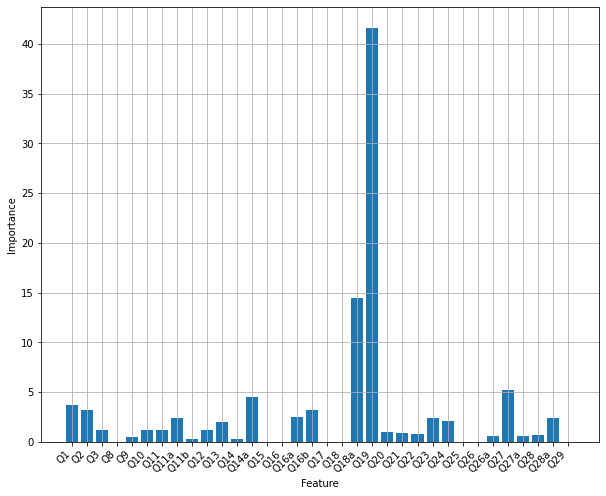

In [ ]:
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()
import matplotlib.pyplot as plt
   
#C = ['Q1', 'Q2', 'Q3', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15',
#       'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21', 'Q22', 'Q23', 'Q24',
#       'Q25', 'Q26', 'Q27', 'Q28', 'Q29']

C = ['Q1', 'Q2', 'Q3','Q8', 'Q9', 'Q10', 'Q11', 'Q11a', 'Q11b', 'Q12', 'Q13',
       'Q14', 'Q14a', 'Q15', 'Q16', 'Q16a', 'Q16b', 'Q17', 'Q18', 'Q18a',
       'Q19', 'Q20', 'Q21', 'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q26a', 'Q27',
       'Q27a', 'Q28', 'Q28a', 'Q29']

GC = importance
# plotting a line plot after changing it's width and height
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(8)
plt.xticks(rotation=45, ha='right')
plt.grid(True)

plt.bar(C, GC)
plt.ylabel('Importance')
plt.xlabel('Feature')
plt.show()

In [ ]:
#SMOTE
import pandas as pd
import sklearn as sk
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from pandas import read_csv
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
# label encode the target variable
y = LabelEncoder().fit_transform(y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
X_tr, X_test, y_tr, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
RF = RandomForestClassifier(n_estimators=100, max_depth=8, random_state=0).fit(X_tr, y_tr)
RF.predict(X_test)
round(RF.score(X_test, y_test), 4)

Class=1, n=225 (85.878%)
Class=0, n=37 (14.122%)


0.9262

Feature: 0, Score: 0.06201
Feature: 1, Score: 0.00920
Feature: 2, Score: 0.02920
Feature: 3, Score: 0.01027
Feature: 4, Score: 0.03260
Feature: 5, Score: 0.02897
Feature: 6, Score: 0.02313
Feature: 7, Score: 0.02225
Feature: 8, Score: 0.02115
Feature: 9, Score: 0.03193
Feature: 10, Score: 0.03488
Feature: 11, Score: 0.01483
Feature: 12, Score: 0.01672
Feature: 13, Score: 0.09899
Feature: 14, Score: 0.01992
Feature: 15, Score: 0.02534
Feature: 16, Score: 0.01006
Feature: 17, Score: 0.00887
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.05627
Feature: 20, Score: 0.23246
Feature: 21, Score: 0.00699
Feature: 22, Score: 0.00694
Feature: 23, Score: 0.02168
Feature: 24, Score: 0.02987
Feature: 25, Score: 0.01253
Feature: 26, Score: 0.00594
Feature: 27, Score: 0.02303
Feature: 28, Score: 0.00952
Feature: 29, Score: 0.01839
Feature: 30, Score: 0.01077
Feature: 31, Score: 0.04214
Feature: 32, Score: 0.00622
Feature: 33, Score: 0.01692


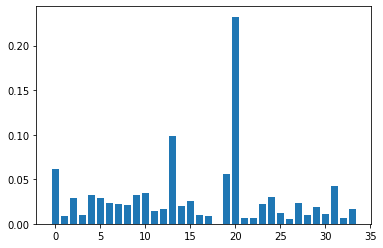

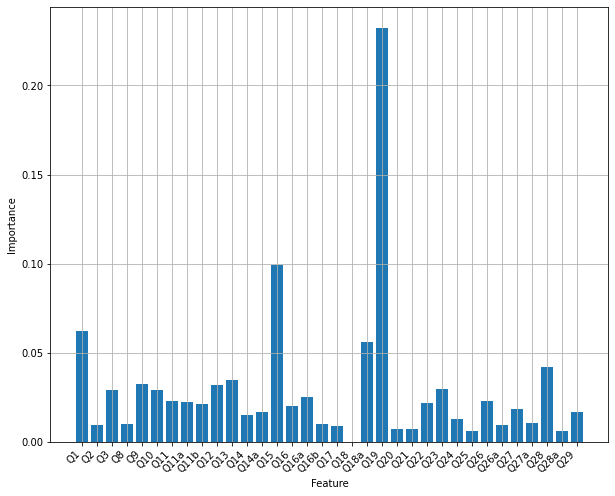

In [ ]:
importance = RF.feature_importances_
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()
import matplotlib.pyplot as plt   
#C = ['Q1', 'Q2', 'Q3', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15',
#       'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21', 'Q22', 'Q23', 'Q24',
#       'Q25', 'Q26', 'Q27', 'Q28', 'Q29']
C = ['Q1', 'Q2','Q3', 'Q8', 'Q9', 'Q10', 'Q11', 'Q11a', 'Q11b', 'Q12', 'Q13',
       'Q14', 'Q14a', 'Q15', 'Q16', 'Q16a', 'Q16b', 'Q17', 'Q18', 'Q18a',
       'Q19', 'Q20', 'Q21', 'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q26a', 'Q27',
       'Q27a', 'Q28', 'Q28a', 'Q29']
GC = importance
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(8)
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.bar(C, GC)
plt.ylabel('Importance')
plt.xlabel('Feature')
plt.show()

Accuracy: 0.961 (0.027)


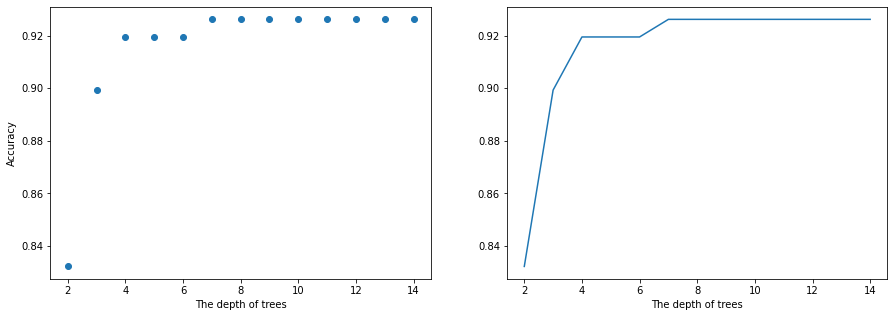

In [ ]:
#LightGBM
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from lightgbm import LGBMClassifier
model = LGBMClassifier()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
Empty=[]
for i in range(2,15):
    model = LGBMClassifier(n_estimators=20, max_depth=i, num_leaves=2**i)
    Light = model.fit(X_tr, y_tr)
    Light.predict(X_test)
    round(Light.score(X_test, y_test), 4)
    Empty.append(round(Light.score(X_test, y_test), 4))
Empty    
names = range(2,15)
values = Empty
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.scatter(names, values)
plt.ylabel('Accuracy')
plt.xlabel('The depth of trees')
plt.subplot(122)
plt.plot(names, values)
plt.xlabel('The depth of trees')
plt.show()

Feature: 0, Score: 12.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 4.00000
Feature: 3, Score: 2.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 7.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 9.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: 3.00000
Feature: 10, Score: 3.00000
Feature: 11, Score: 7.00000
Feature: 12, Score: 3.00000
Feature: 13, Score: 24.00000
Feature: 14, Score: 2.00000
Feature: 15, Score: 2.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 29.00000
Feature: 20, Score: 48.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 7.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 5.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 4.00000
Feature: 28, Score: 19.00000
Feature: 29, Score: 7.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 9.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000


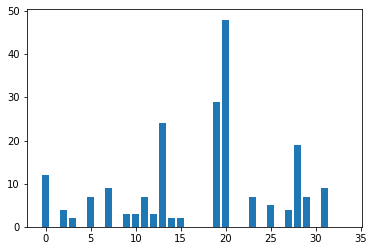

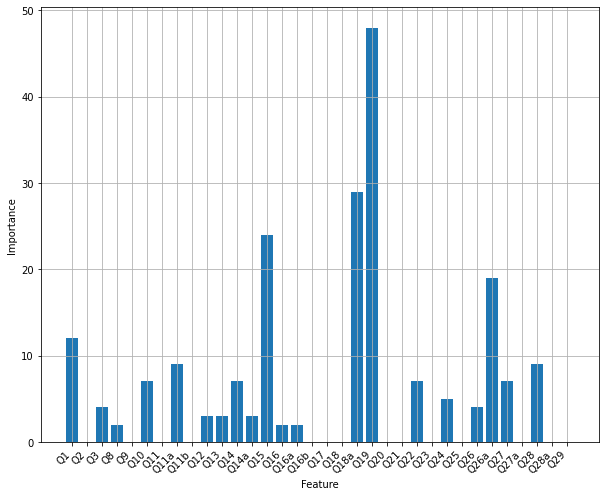

In [ ]:
importance = Light.feature_importances_
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()
import matplotlib.pyplot as plt
   
#C= ['Q1', 'Q2', 'Q3', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15',
#       'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21', 'Q22', 'Q23', 'Q24',
#       'Q25', 'Q26', 'Q27', 'Q28', 'Q29']

C = ['Q1', 'Q2', 'Q3','Q8', 'Q9', 'Q10', 'Q11', 'Q11a', 'Q11b', 'Q12', 'Q13',
       'Q14', 'Q14a', 'Q15', 'Q16', 'Q16a', 'Q16b', 'Q17', 'Q18', 'Q18a',
       'Q19', 'Q20', 'Q21', 'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q26a', 'Q27',
       'Q27a', 'Q28', 'Q28a', 'Q29']

GC = importance
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(8)
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.bar(C, GC)
plt.ylabel('Importance')
plt.xlabel('Feature')
plt.show()